In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from importlib import reload

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
import networkx as nx
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
final_cols=['compactness_worst','compactness_mean','compactness_se','concavity_se','concavity_worst',
            'fractal_dimension_worst','radius_se','smoothness_se','symmetry_worst','concave points_mean',
            'smoothness_mean','smoothness_worst','symmetry_mean','fractal_dimension_mean','radius_mean',
            'radius_worst','symmetry_se','texture_se']

In [5]:
sys.path.insert(0,'C:\\Users\\Faith Bagire\\PycharmProjects\\pythonProject\\causal_impact\\modules')

In [6]:
import read_data

In [7]:
reload(read_data)

<module 'read_data' from 'C:\\Users\\Faith Bagire\\PycharmProjects\\pythonProject\\causal_impact\\modules\\read_data.py'>

In [8]:
data=read_data.read_data('../Data/data.csv')

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data=data[final_cols+['diagnosis']]

In [11]:
data.head()

,compactness_worst,compactness_mean,compactness_se,concavity_se,concavity_worst,fractal_dimension_worst,radius_se,smoothness_se,symmetry_worst,concave points_mean,smoothness_mean,smoothness_worst,symmetry_mean,fractal_dimension_mean,radius_mean,radius_worst,symmetry_se,texture_se,diagnosis
0,0.6656,0.27760,0.04904,0.05373,0.7119,0.11890,1.0950,0.006399,0.4601,0.14710,0.11840,0.1622,0.2419,0.07871,17.99,25.38,0.03003,0.9053,1
1,0.1866,0.07864,0.01308,0.01860,0.2416,0.08902,0.5435,0.005225,0.2750,0.07017,0.08474,0.1238,0.1812,0.05667,20.57,24.99,0.01389,0.7339,1
2,0.4245,0.15990,0.04006,0.03832,0.4504,0.08758,0.7456,0.006150,0.3613,0.12790,0.10960,0.1444,0.2069,0.05999,19.69,23.57,0.02250,0.7869,1
3,0.8663,0.28390,0.07458,0.05661,0.6869,0.17300,0.4956,0.009110,0.6638,0.10520,0.14250,0.2098,0.2597,0.09744,11.42,14.91,0.05963,1.1560,1
4,0.2050,0.13280,0.02461,0.05688,0.4000,0.07678,0.7572,0.011490,0.2364,0.10430,0.10030,0.1374,0.1809,0.05883,20.29,22.54,0.01756,0.7813,1


In [12]:
x=data[final_cols]
y=data[['diagnosis']]

**Train and Test data split**

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

**Data Scaling**

In [14]:
scaler = MinMaxScaler()

In [29]:
def scale_data(x_train, x_test, y_train, y_test):
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
    x_test = pd.DataFrame(scaler.transform(x_test), columns=x.columns)
    data_scaled=x_train.join(y_train)
    #Drop the nan diadnosis data because they belong to test data during train,test split
    data_scaled_train=data_scaled.dropna(subset=['diagnosis'])
    return data_scaled,data_scaled_train

In [30]:
_,data_scaled=scale_data(x_train, x_test, y_train, y_test)

In [31]:
data_scaled.isna().sum()

compactness_worst          0
compactness_mean           0
compactness_se             0
concavity_se               0
concavity_worst            0
fractal_dimension_worst    0
radius_se                  0
smoothness_se              0
symmetry_worst             0
concave points_mean        0
smoothness_mean            0
smoothness_worst           0
symmetry_mean              0
fractal_dimension_mean     0
radius_mean                0
radius_worst               0
symmetry_se                0
texture_se                 0
diagnosis                  0
dtype: int64

In [32]:
sm=from_pandas(data_scaled)

In [43]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

ValueError: Program fdp not found in path.

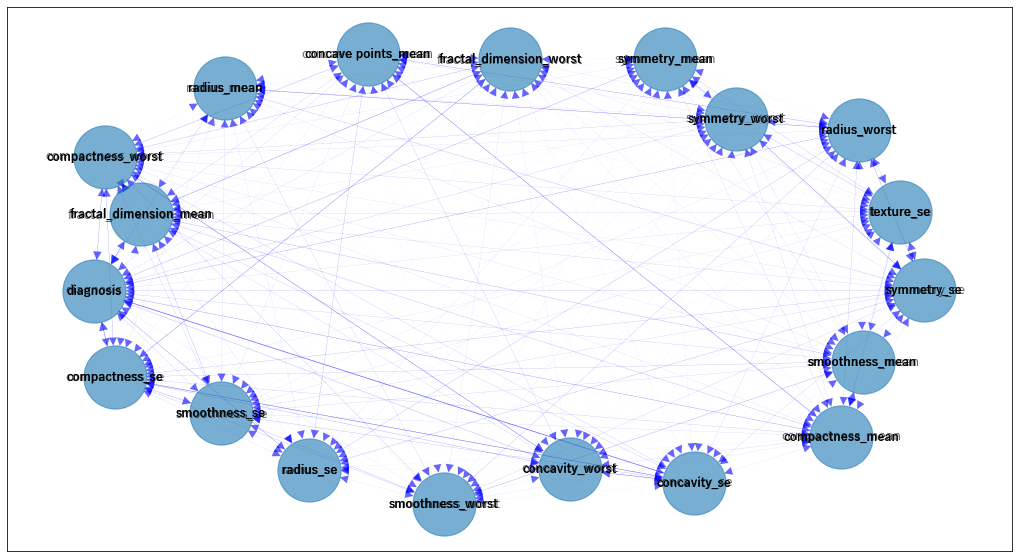

In [42]:
plt.figure(figsize=(18,10))
pos = nx.spring_layout(sm, k=60)

edge_width = [ d['weight']*0.3 for (u,v,d) in sm.edges(data=True)]
#nx.draw_networkx_labels(sm, pos, fontsize=16, font_family="Yu Gothic", font_weight="bold")
nx.draw_networkx_labels(sm, pos, font_family="Yu Gothic", font_weight="bold")
nx.draw_networkx(sm,
                 pos,
                 node_size=4000,
                 arrowsize=20,
                 alpha=0.6,
                 edge_color='b',
                 width=edge_width)

The reason why we have a fully connected graph here is we haven’t applied thresholding to the weaker edges. Thresholding can be applied either by specifying the value for the parameter w_threshold in from_pandas, or we can remove the edges by calling the structure model function, remove_edges_below_threshold.